# Module 5 - Modern Portfolio Theory

### Query 5.1 
5.1 For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. **( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )**

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"RAYMOND.csv")
df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RAYMOND,EQ,15-May-2017,763.45,765.00,779.00,757.05,773.90,772.80,770.09,292498,2.252491e+08,9033,55467,18.96
1,RAYMOND,EQ,16-May-2017,772.80,773.45,801.45,768.10,783.50,785.00,788.89,823956,6.500070e+08,18238,179377,21.77
2,RAYMOND,EQ,17-May-2017,785.00,786.00,804.95,778.40,785.50,783.65,792.72,598094,4.741212e+08,13968,127637,21.34
3,RAYMOND,EQ,18-May-2017,783.65,779.35,779.95,740.20,744.00,746.95,762.57,319834,2.438956e+08,7713,92200,28.83
4,RAYMOND,EQ,19-May-2017,746.95,748.00,767.50,714.00,722.00,723.10,740.30,561346,4.155619e+08,13328,137648,24.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,RAYMOND,EQ,07-May-2019,806.05,806.05,821.60,799.25,811.15,808.95,814.61,2038484,1.660574e+09,33444,321610,15.78
490,RAYMOND,EQ,08-May-2019,808.95,807.90,816.90,797.05,806.40,807.10,807.55,930010,7.510262e+08,19028,51327,5.52
491,RAYMOND,EQ,09-May-2019,807.10,801.00,811.10,798.00,805.25,805.30,804.23,425205,3.419611e+08,8608,34675,8.15
492,RAYMOND,EQ,10-May-2019,805.30,809.95,815.00,795.05,804.00,804.40,804.95,464539,3.739298e+08,9381,22009,4.74


In [3]:
df['Daily Return'] = (df['Close Price']).pct_change() 
df['Daily Return'] = df['Daily Return'].replace([np.inf, -np.inf], np.nan)
df = df.dropna()
print("Mean Daily Return")
df['Daily Return'].mean()

Mean Daily Return


0.0002778592058138787

In [66]:
df['Daily Standard Deviation'] = (df['Close Price']).pct_change() 
df['Daily Standard Deviation'] = df['Daily Standard Deviation'].replace([np.inf, -np.inf], np.nan)
df = df.dropna()
print("Daily Standard Deviation")
df['Daily Standard Deviation'].std()

Daily Standard Deviation


0.02295526189176468

In [5]:
annual_mean =  0.0002778592058138787 * 252
print("Annual Mean: "+ str(annual_mean))

Annual Mean: 0.07002051986509743


In [6]:
import math
annual_stdev = 0.02293204594926426 * math.sqrt(252)
print("Annual Standard Deviation: "+ str(annual_stdev))

Annual Standard Deviation: 0.3640349438139561


### Query 5.2 
Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )

In [7]:
FORTIS = pd.read_csv('FORTIS.csv')
FORTIS

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,FORTIS,EQ,15-May-2017,208.40,208.40,209.65,204.05,206.75,205.25,205.66,9078354,1.867055e+09,24607,5980115,65.87
1,FORTIS,EQ,16-May-2017,205.25,206.25,209.45,205.45,207.70,207.90,207.86,2146212,4.461109e+08,15071,1127662,52.54
2,FORTIS,EQ,17-May-2017,207.90,208.00,210.80,204.90,205.30,205.90,208.01,3032479,6.307854e+08,21453,1609171,53.06
3,FORTIS,EQ,18-May-2017,205.90,204.00,205.25,195.00,195.80,196.85,200.05,2852401,5.706199e+08,18709,1337328,46.88
4,FORTIS,EQ,19-May-2017,196.85,197.80,204.90,196.45,204.20,203.55,200.95,4144993,8.329173e+08,37949,1424440,34.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,FORTIS,EQ,07-May-2019,136.35,136.00,136.70,135.00,135.35,135.20,135.94,165465,2.249316e+07,865,99695,60.25
491,FORTIS,EQ,08-May-2019,135.20,135.35,135.75,133.30,133.50,133.60,134.16,377871,5.069361e+07,2454,246366,65.20
492,FORTIS,EQ,09-May-2019,133.60,133.60,133.75,132.30,133.05,133.00,132.89,959494,1.275065e+08,7299,798500,83.22
493,FORTIS,EQ,10-May-2019,133.00,133.05,133.60,131.00,131.50,131.90,132.55,868778,1.151553e+08,3592,658577,75.80


In [8]:
CIPLA = pd.read_csv('CIPLA.csv')
CIPLA

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,CIPLA,EQ,15-May-2017,567.95,567.00,572.45,561.00,566.65,569.00,568.17,606569,3.446364e+08,20905,349445,57.61
1,CIPLA,EQ,16-May-2017,569.00,566.65,570.00,564.00,565.70,565.60,565.88,330195,1.868504e+08,13421,166079,50.30
2,CIPLA,EQ,17-May-2017,565.60,565.10,566.00,560.05,561.05,562.35,562.01,895238,5.031284e+08,35003,641507,71.66
3,CIPLA,EQ,18-May-2017,562.35,559.30,564.95,556.80,560.90,560.10,560.16,2155599,1.207477e+09,12636,1862981,86.43
4,CIPLA,EQ,19-May-2017,560.10,561.30,566.65,558.65,564.20,564.95,561.86,685662,3.852487e+08,10878,376701,54.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,CIPLA,EQ,07-May-2019,563.35,564.00,566.30,555.15,557.25,557.95,560.62,1478212,8.287169e+08,27928,724475,49.01
492,CIPLA,EQ,08-May-2019,557.95,556.00,561.40,549.00,560.00,558.00,555.57,1890174,1.050132e+09,37924,695243,36.78
493,CIPLA,EQ,09-May-2019,558.00,559.90,561.05,548.70,556.10,557.75,554.26,1672967,9.272624e+08,28267,562752,33.64
494,CIPLA,EQ,10-May-2019,557.75,557.75,562.70,551.00,552.80,555.55,557.24,1687480,9.403388e+08,40212,843719,50.00


In [9]:
VOLTAS = pd.read_csv('VOLTAS.csv')
VOLTAS

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,VOLTAS,EQ,15-May-2017,433.55,436.00,436.40,430.10,433.40,431.85,432.15,696583,3.010253e+08,14160,327583,47.03
1,VOLTAS,EQ,16-May-2017,431.85,432.00,438.20,430.70,433.00,432.45,433.46,996780,4.320614e+08,19456,366664,36.78
2,VOLTAS,EQ,17-May-2017,432.45,435.00,435.00,427.25,430.85,430.20,429.93,686830,2.952867e+08,11494,307390,44.75
3,VOLTAS,EQ,18-May-2017,430.20,425.10,427.00,412.70,414.50,414.10,418.14,1231618,5.149912e+08,18700,571822,46.43
4,VOLTAS,EQ,19-May-2017,414.10,414.35,419.90,410.95,416.00,415.75,414.98,869457,3.608041e+08,29631,313872,36.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,VOLTAS,EQ,07-May-2019,606.05,609.30,611.45,599.70,603.00,601.45,606.32,702629,4.260201e+08,21016,272966,38.85
490,VOLTAS,EQ,08-May-2019,601.45,599.00,599.00,571.55,575.00,576.65,585.97,3342049,1.958347e+09,73711,1258007,37.64
491,VOLTAS,EQ,09-May-2019,576.65,574.00,580.70,568.75,569.50,574.10,574.96,1911454,1.099015e+09,24155,420130,21.98
492,VOLTAS,EQ,10-May-2019,574.10,540.00,586.00,537.70,574.10,580.05,562.24,15335100,8.621946e+09,172065,2418157,15.77


In [10]:
PNB = pd.read_csv('PNB.csv')
PNB

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,PNB,EQ,15-May-2017,169.15,169.95,171.30,166.20,166.85,166.80,168.94,7476618,1.263123e+09,41641,1352589,18.09
1,PNB,EQ,16-May-2017,166.80,167.35,178.00,164.80,173.20,174.15,173.13,51532461,8.921904e+09,254027,5804867,11.26
2,PNB,EQ,17-May-2017,174.15,173.00,173.10,164.30,164.80,165.05,167.27,26536944,4.438942e+09,116512,7037498,26.52
3,PNB,EQ,18-May-2017,165.05,163.40,164.40,157.90,158.25,158.50,161.06,13905573,2.239613e+09,76746,3245443,23.34
4,PNB,EQ,19-May-2017,158.50,159.50,162.25,154.10,155.20,155.20,157.59,16311602,2.570540e+09,82394,2816963,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,PNB,EQ,07-May-2019,86.25,86.70,87.15,83.40,84.05,83.95,85.62,16356567,1.400418e+09,37679,2333933,14.27
490,PNB,EQ,08-May-2019,83.95,83.75,85.40,83.25,84.05,83.95,84.43,23380690,1.974095e+09,52244,2674859,11.44
491,PNB,EQ,09-May-2019,83.95,84.10,85.35,82.80,84.50,84.25,84.30,22934344,1.933317e+09,44704,2025433,8.83
492,PNB,EQ,10-May-2019,84.25,85.00,87.25,84.40,86.00,86.25,85.53,21821500,1.866353e+09,44879,1950720,8.94


In [11]:
BAJAJELEC = pd.read_csv('BAJAJELEC.csv')
BAJAJELEC

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BAJAJELEC,EQ,15-May-2017,350.75,351.20,352.30,339.10,342.00,341.15,344.83,150265,51815366.05,2733,91705,61.03
1,BAJAJELEC,EQ,16-May-2017,341.15,342.90,350.50,341.65,346.60,347.00,346.14,118849,41138046.60,2671,53340,44.88
2,BAJAJELEC,EQ,17-May-2017,347.00,347.10,352.00,345.85,349.50,349.85,349.90,108592,37996454.75,2259,46366,42.70
3,BAJAJELEC,EQ,18-May-2017,349.85,346.95,346.95,331.50,336.00,334.10,339.31,158652,53831647.20,3454,91087,57.41
4,BAJAJELEC,EQ,19-May-2017,334.10,339.05,344.00,332.00,335.50,336.20,338.64,129244,43767310.50,3097,47468,36.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,BAJAJELEC,EQ,07-May-2019,557.85,561.00,565.00,552.05,558.20,557.75,557.86,68237,38066482.60,5173,21908,32.11
490,BAJAJELEC,EQ,08-May-2019,557.75,561.00,561.00,530.00,531.00,534.45,544.69,160037,87171061.90,11144,39062,24.41
491,BAJAJELEC,EQ,09-May-2019,534.45,531.00,535.40,525.50,530.70,531.85,530.82,81531,43278252.70,3990,32290,39.60
492,BAJAJELEC,EQ,10-May-2019,531.85,528.00,545.00,521.60,543.45,540.90,533.29,177917,94880470.80,7768,31813,17.88


In [56]:
data['FORTIS'] = pd.DataFrame(FORTIS['Close Price'])
data['CIPLA'] = pd.DataFrame(CIPLA['Close Price'])
data['VOLTAS'] = pd.DataFrame(VOLTAS['Close Price'])
data['PNB'] = pd.DataFrame(PNB['Close Price'])
data['BAJAJELEC'] = pd.DataFrame(BAJAJELEC['Close Price'])
print("Closing Prices of the 5 respective stocks")
data2 = data

Closing Prices of the 5 respective stocks


In [57]:
data2

,FORTIS,CIPLA,VOLTAS,PNB,BAJAJELEC
0,205.25,569.00,431.85,166.80,341.15
1,207.90,565.60,432.45,174.15,347.00
2,205.90,562.35,430.20,165.05,349.85
3,196.85,560.10,414.10,158.50,334.10
4,203.55,564.95,415.75,155.20,336.20
...,...,...,...,...,...
507,NaN,NaN,NaN,NaN,NaN
508,NaN,NaN,NaN,NaN,NaN
509,NaN,NaN,NaN,NaN,NaN
510,NaN,NaN,NaN,NaN,NaN


### Query 5.3 
Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

In [58]:
import numpy as np
returns = data2.pct_change()
mean_daily_returns = returns.mean()
mean_daily_returns = mean_daily_returns.values.reshape(5,1)
cov_matrix = returns.cov()
weights = np.asarray([0.2,0.2,0.2,0.2,0.2])
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)
print('Portfolio expected annualised return is {} and volatility is {}'.format(portfolio_return,portfolio_std_dev))

Portfolio expected annualised return is 0.13 and volatility is 0.21


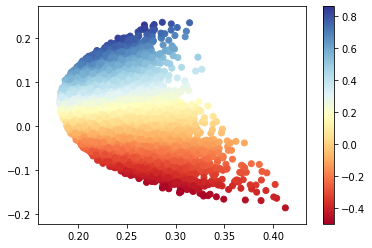

In [70]:
returns = data2.pct_change()
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
results = np.zeros((3,num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(5)
    weights /= np.sum(weights)    
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = results[0,i] / results[1,i]    
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])
results_frame

plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()

### Query 5.4 
Mark the 2 portfolios where -
Portfolio 1 - The Sharpe ratio is the highest
Portfolio 2 - The volatility is the lowest. 

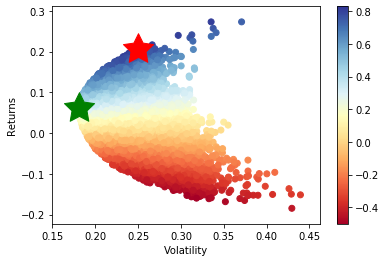

In [73]:
stocks = ['FORTIS','PNB','CIPLA','VOLTAS','BAJAJELEC']

returns = data2.pct_change()
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

num_portfolios = 25000
results = np.zeros((4+len(stocks)-1,num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(5)
    weights /= np.sum(weights)
    
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)    

    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = results[0,i] / results[1,i]  

    for j in range(len(weights)):
        results[j+3,i] = weights[j]
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4]])

max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)